<a href="https://colab.research.google.com/github/1jamjam/Data-Science---Python-/blob/main/EUR_USD_Predictions_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
df = pd.read_csv("eurusd_hour.csv")
df.head()

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008
3,2005-05-02,03:00,1.2851,1.2859,1.2850,1.2851,0.0000,1.2853,1.2861,1.2852,1.2853,0.0000
4,2005-05-02,04:00,1.2852,1.2859,1.2849,1.2855,0.0003,1.2854,1.2861,1.2851,1.2857,0.0003


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

,0
Date,datetime64[ns]
Time,object
BO,float64
BH,float64
BL,float64
BC,float64
BCh,float64
AO,float64
AH,float64
AL,float64


<Axes: xlabel='Date', ylabel='BC'>

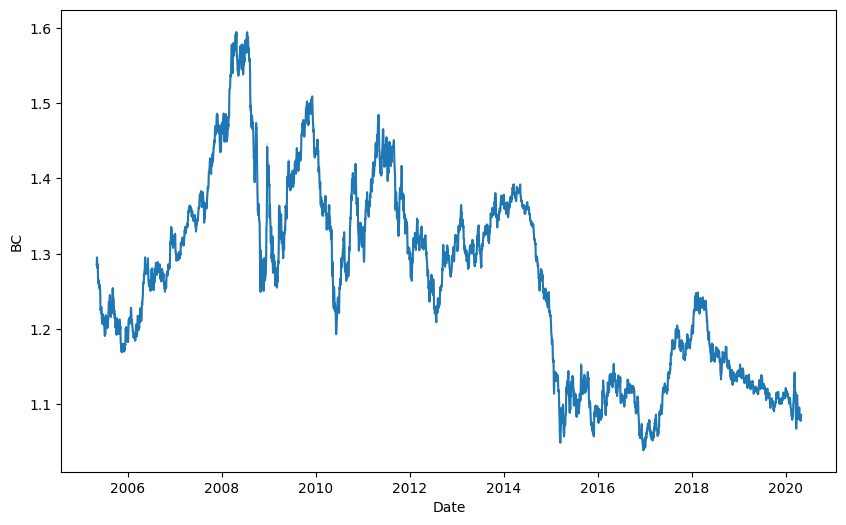

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = "Date", y = "BC", data = df)

In [ ]:
#df = df.drop( "AO", 'AH', "AL", "AC", "ACh", axis = 1)

In [ ]:
#df = df.drop(["AO", 'AH', "AL", "AC", "ACh"], axis=1)

In [ ]:
df

,Date,BC
0,2005-05-02,1.28440
1,2005-05-02,1.28420
2,2005-05-02,1.28510
3,2005-05-02,1.28510
4,2005-05-02,1.28550
...,...,...
93079,2020-04-29,1.08713
93080,2020-04-29,1.08748
93081,2020-04-29,1.08708
93082,2020-04-29,1.08714


In [ ]:
df = df.rename(columns = {"BC": "y"})
df

,ds,y
0,2005-05-02,1.28440
1,2005-05-02,1.28420
2,2005-05-02,1.28510
3,2005-05-02,1.28510
4,2005-05-02,1.28550
...,...,...
93079,2020-04-29,1.08713
93080,2020-04-29,1.08748
93081,2020-04-29,1.08708
93082,2020-04-29,1.08714


In [ ]:
split_date = '2018-01-01'
split_date = pd.to_datetime(split_date, format='%Y-%m-%d') # Changed the format string
df_train = df.loc[df['ds'] <= split_date].copy()
df_test = df.loc[df['ds'] > split_date].copy()

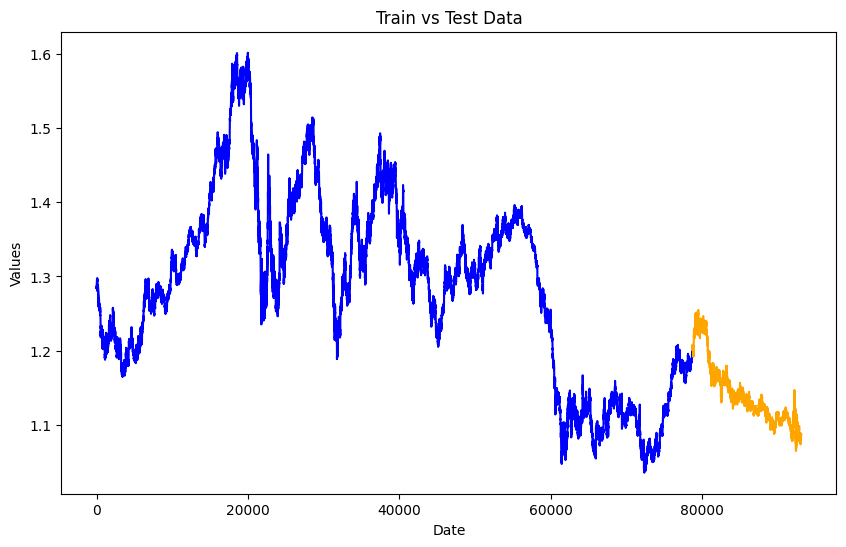

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_train['y'], label='Train Data', color='blue')

# Plot the test data
plt.plot(df_test['y'], label='Test Data', color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Train vs Test Data')

plt.show()

In [ ]:
model = Prophet()
model.fit(df_train)

df_test_fcst = model.predict(df_test)

df_test_fcst.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp45kkpwm8/se23m7ae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp45kkpwm8/uqzeo7mo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76607', 'data', 'file=/tmp/tmp45kkpwm8/se23m7ae.json', 'init=/tmp/tmp45kkpwm8/uqzeo7mo.json', 'output', 'file=/tmp/tmp45kkpwm8/prophet_modeladwmixah/prophet_model-20241114154056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:40:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-02,1.143497,1.097180,1.169380,1.143497,1.143497,-0.011213,-0.011213,-0.011213,-0.002426,-0.002426,-0.002426,-0.008787,-0.008787,-0.008787,0.0,0.0,0.0,1.132284
1,2018-01-02,1.143497,1.095619,1.170074,1.143497,1.143497,-0.011213,-0.011213,-0.011213,-0.002426,-0.002426,-0.002426,-0.008787,-0.008787,-0.008787,0.0,0.0,0.0,1.132284
2,2018-01-02,1.143497,1.094267,1.169123,1.143497,1.143497,-0.011213,-0.011213,-0.011213,-0.002426,-0.002426,-0.002426,-0.008787,-0.008787,-0.008787,0.0,0.0,0.0,1.132284
3,2018-01-02,1.143497,1.095505,1.168116,1.143497,1.143497,-0.011213,-0.011213,-0.011213,-0.002426,-0.002426,-0.002426,-0.008787,-0.008787,-0.008787,0.0,0.0,0.0,1.132284
4,2018-01-02,1.143497,1.097311,1.167776,1.143497,1.143497,-0.011213,-0.011213,-0.011213,-0.002426,-0.002426,-0.002426,-0.008787,-0.008787,-0.008787,0.0,0.0,0.0,1.132284


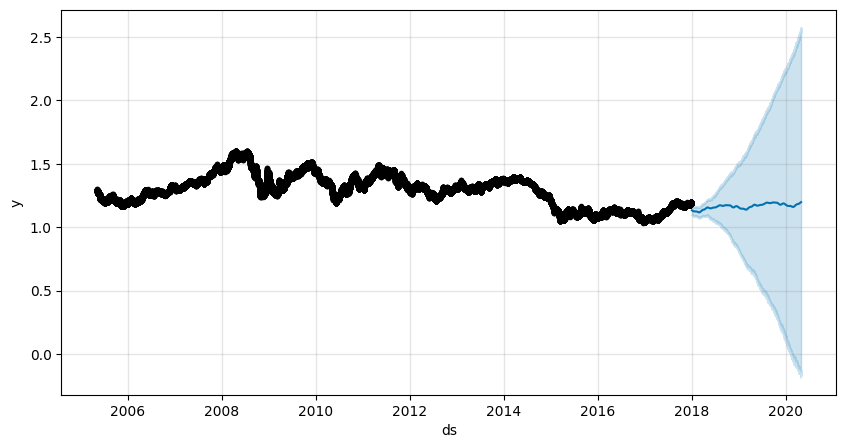

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(df_test_fcst, ax=ax)
plt.show()

#Comparing Forecast to Actuals
# Plot forecast along with actual values

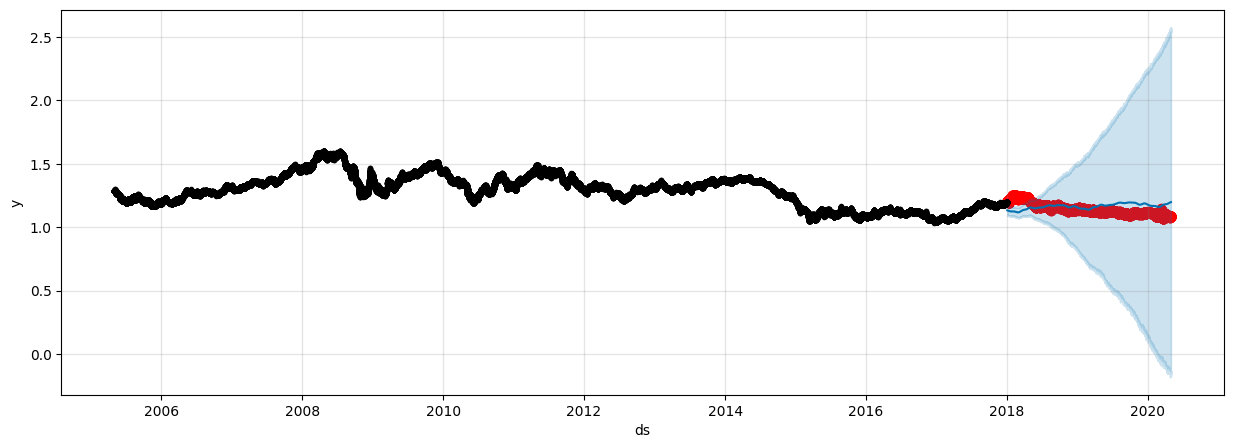

In [ ]:
f, ax = plt.subplots(figsize=(15,5))
ax.scatter(df_test['ds'], df_test['y'], color = 'r')
fig = model.plot(df_test_fcst, ax=ax)

In [ ]:
# Evaluating the model using Error Metrics

#Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

np.sqrt(mean_squared_error(y_true=df_test['y'],
                           y_pred = df_test_fcst['yhat']))

0.06346248772017866

In [ ]:
# Mean Absolute Percent Error

mean_absolute_percentage_error(y_true=df_test['y'],
y_pred=df_test_fcst['yhat'])


0.04633926233488684

In [ ]:
# Predicting Into the Future!!

future = model.make_future_dataframe(periods = 183, include_history = False)
forecast = model.predict(future)

forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-30,1.143320,1.113751,1.188526,1.143320,1.143320,0.007525,0.007525,0.007525,0.013708,0.013708,0.013708,-0.006183,-0.006183,-0.006183,0.0,0.0,0.0,1.150845
1,2017-12-31,1.143379,1.098482,1.169480,1.143379,1.143379,-0.009346,-0.009346,-0.009346,-0.002281,-0.002281,-0.002281,-0.007064,-0.007064,-0.007064,0.0,0.0,0.0,1.134034
2,2018-01-01,1.143438,1.101548,1.171630,1.143438,1.143438,-0.010297,-0.010297,-0.010297,-0.002363,-0.002363,-0.002363,-0.007934,-0.007934,-0.007934,0.0,0.0,0.0,1.133141
3,2018-01-02,1.143497,1.095508,1.166756,1.143497,1.143497,-0.011213,-0.011213,-0.011213,-0.002426,-0.002426,-0.002426,-0.008787,-0.008787,-0.008787,0.0,0.0,0.0,1.132284
4,2018-01-03,1.143556,1.094978,1.167051,1.143556,1.143556,-0.011897,-0.011897,-0.011897,-0.002277,-0.002277,-0.002277,-0.009620,-0.009620,-0.009620,0.0,0.0,0.0,1.131659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2018-06-26,1.153785,1.052452,1.271082,1.056771,1.274316,0.000096,0.000096,0.000096,-0.002426,-0.002426,-0.002426,0.002522,0.002522,0.002522,0.0,0.0,0.0,1.153881
179,2018-06-27,1.153844,1.051811,1.279595,1.056106,1.275138,0.000231,0.000231,0.000231,-0.002277,-0.002277,-0.002277,0.002509,0.002509,0.002509,0.0,0.0,0.0,1.154075
180,2018-06-28,1.153903,1.058788,1.274007,1.055441,1.276442,0.000335,0.000335,0.000335,-0.002185,-0.002185,-0.002185,0.002519,0.002519,0.002519,0.0,0.0,0.0,1.154238
181,2018-06-29,1.153962,1.048776,1.284984,1.054775,1.277447,0.000383,0.000383,0.000383,-0.002176,-0.002176,-0.002176,0.002559,0.002559,0.002559,0.0,0.0,0.0,1.154344


<Axes: xlabel='ds', ylabel='yhat'>

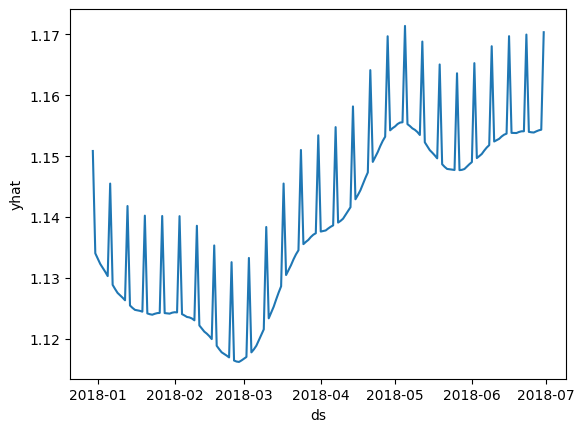

In [ ]:
sns.lineplot(x = 'ds', y = 'yhat', data = forecast)